<a href="https://colab.research.google.com/github/Jair2472/Modelos_de_Prediccion/blob/main/Modelo_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("/content/25 BD.csv", encoding="utf-8")  # usa ISO-8859-1 si hay error

# Preprocesamiento inicial
df.columns = df.columns.str.strip()  # quitar espacios en columnas
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfPeriod'] = df.groupby(['FiscalYear', 'Period', 'Depto']).cumcount() + 1

<ipython-input-11-0546497a8c01>:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
train_df = df[df['FiscalYear'] < 2023]
test_df = df[df['FiscalYear'] == 2023]

In [ ]:
df.head()

,FiscalYear,Period,Date,Depto,VentasAcum,CostosAcum,IngresosAcum,MargenFinal%,DayOfPeriod
0,2019,1,2018-10-29,123,25582.84437,6224.742985,-178.195595,0.200765,1
1,2019,1,2018-10-30,123,52294.89596,12551.411640,-211.506122,0.200765,2
2,2019,1,2018-10-31,123,75989.98114,17472.170950,-445.821574,0.200765,3
3,2019,1,2018-11-01,123,101996.77740,23246.260370,-820.099531,0.200765,4
4,2019,1,2018-11-02,123,130852.26790,29349.922940,-1185.005452,0.200765,5


In [ ]:
# Procesar ambos conjuntos (features y target)
y_train = train_df['MargenFinal%']
y_test = test_df['MargenFinal%']

features = ['VentasAcum', 'CostosAcum', 'IngresosAcum', 'DayOfPeriod', 'Depto']

# One-hot y conversión a float32
X_train = pd.get_dummies(train_df[features], columns=['Depto'], drop_first=True).astype('float32')
X_test = pd.get_dummies(test_df[features], columns=['Depto'], drop_first=True).astype('float32')

# Alinear columnas por si faltan dummies en test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(f"Score entrenamiento: {model.score(X_train, y_train):.4f}")
print(f"Score prueba (2023): {model.score(X_test, y_test):.4f}")


Score entrenamiento: 0.9569
Score prueba (2023): 0.8010


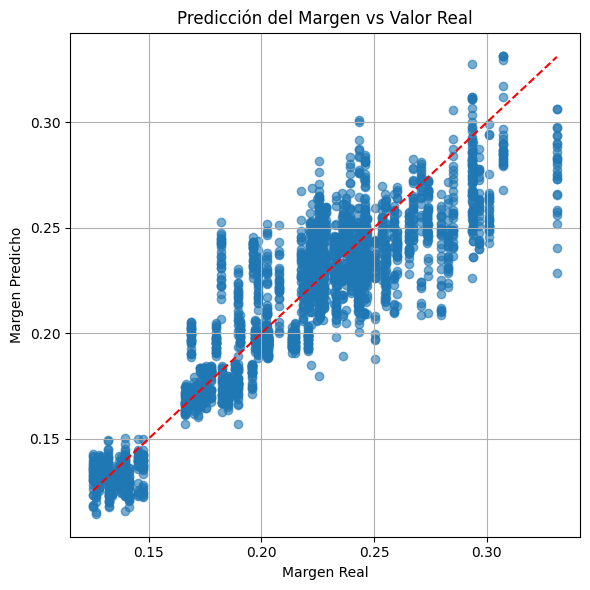

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicciones
y_pred = model.predict(X_test)

# Gráfica real vs predicho
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Margen Real")
plt.ylabel("Margen Predicho")
plt.title("Predicción del Margen vs Valor Real")
plt.grid(True)
plt.tight_layout()
plt.show()

# Métricas
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
